In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-data/zomato.csv
/kaggle/input/zomato-restaurants-data/file5.json
/kaggle/input/zomato-restaurants-data/file1.json
/kaggle/input/zomato-restaurants-data/file2.json
/kaggle/input/zomato-restaurants-data/file4.json
/kaggle/input/zomato-restaurants-data/file3.json
/kaggle/input/zomato-restaurants-data/Country-Code.xlsx


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# data
data_df = pd.read_csv('../input/zomato-restaurants-data/zomato.csv',encoding="latin-1")
data_df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data_df.shape

(9551, 21)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
data_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
data_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

There are 9 null values in cuisines.

In [9]:
data_df.rename(columns = {'Country Code':'Country_code'}, inplace = True)
data_df.head(3)

,Restaurant ID,Restaurant Name,Country_code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [10]:
data_df.City.value_counts().head(10)

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64

In [11]:
data_df.Cuisines.value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [12]:
#let focus on a particular city and find that which kind of cusine is preferable

df_city = data_df[(data_df.City == 'Gurgaon')]
df_city.head(5)

,Restaurant ID,Restaurant Name,Country_code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1161,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",...,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1162,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
1163,2787,Punjab Grill,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
1164,3431,Zambar,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
1165,303699,Cakes & More,1,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


In [13]:
df_city.rename(columns = {'Restaurant Name':'Restaurant_Name'}, inplace = True)
df_city.head(2)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Restaurant ID,Restaurant_Name,Country_code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1161,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.03931,28.424831,"Cafe, Beverages",...,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1162,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.03922,28.424913,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80


In [14]:
df_city.Cuisines.value_counts()

North Indian                                                105
North Indian, Chinese                                        66
Cafe                                                         45
North Indian, Mughlai                                        42
Bakery                                                       35
                                                           ... 
Korean, Japanese, Chinese, Asian                              1
Continental, Finger Food, Chinese, North Indian               1
Mughlai, Hyderabadi                                           1
Chinese, North Indian, Italian, Continental                   1
Mithai, Street Food, South Indian, Chinese, North Indian      1
Name: Cuisines, Length: 362, dtype: int64

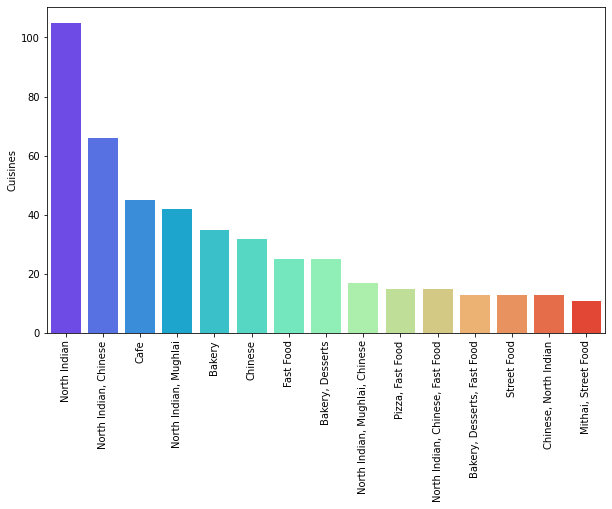

In [15]:
#top 15 popular cuisines
plt.figure(figsize=(10,6))
plot1 = sns.barplot(x = df_city.Cuisines.value_counts()[:15,].index, y = df_city.Cuisines.value_counts()[:15,], data = df_city, palette='rainbow')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [16]:
df_city.Locality.value_counts().head(20)

DLF Phase 3                              69
Sector 56                                54
Sector 14                                52
Palam Vihar                              49
Sohna Road                               42
Cyber Hub, DLF Cyber City                41
Old Railway Road                         41
Sector 29                                38
Udyog Vihar                              37
Sector 31                                35
Sector 45                                31
Sushant Lok                              30
DLF Phase 1                              27
Golf Course Road                         27
Unitech Infospace, Sector 21, Gurgaon    25
MG Road                                  24
MGF Metropolitan Mall, MG Road           24
Sector 17                                21
DLF Phase 4                              21
Sector 39                                20
Name: Locality, dtype: int64

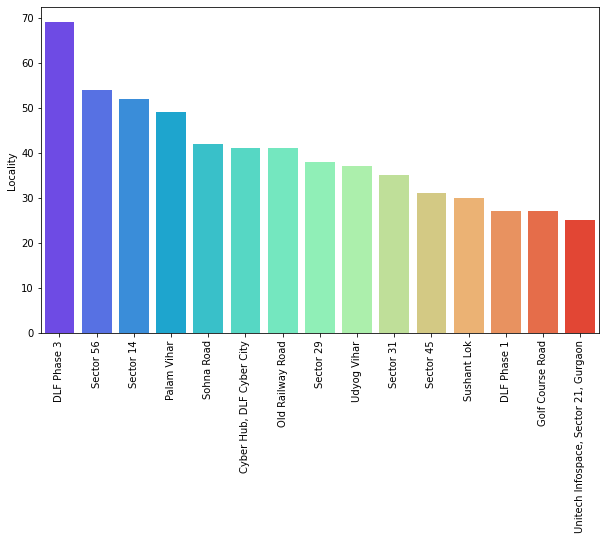

In [17]:
# top 15 localities that has maximum restaurants
plt.figure(figsize=(10,6))
plot1 = sns.barplot(x = df_city.Locality.value_counts()[:15,].index, y = df_city.Locality.value_counts()[:15,], data = df_city, palette='rainbow')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [18]:
# Let us find out the most expensive and least expensive restaurants. 
# which locations have mostly expensive resturants and which have less expensive one
# if we want to have some particular cuisine, which restaurants shall we choose. 
# https://www.kaggle.com/code/hkapoor/eda-tutorial-indian-restaurants
# https://towardsdatascience.com/use-data-science-to-locate-your-next-restaurant-e99b27efec3b
# the best 5 restaurants for popular cuisine. 

#plt.figure(figsize=(15,20))
#plot1 = sns.barplot(x = 'Average Cost for two', y = 'Restaurant_Name', data = df_city, palette='Spectral')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.show()




#df_city.Av.value_counts().head(20)
df_city.columns
df_city.rename(columns = {'Average Cost for two':'Average_cost_for_two'}, inplace = True)
df_city.head(2)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Restaurant ID,Restaurant_Name,Country_code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1161,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.03931,28.424831,"Cafe, Beverages",...,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1162,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.03922,28.424913,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80


In [19]:
# let's focus on a particular area/locality : 
df_area = df_city[df_city.Locality == 'DLF Phase 3']
df_area.head(2)

,Restaurant ID,Restaurant_Name,Country_code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1334,3565,A 1 - Snacks and food corner,1,Gurgaon,"Shop 2, U-73, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.094208,28.489992,"North Indian, Chinese, Fast Food",...,Indian Rupees(Rs.),No,Yes,No,No,1,2.5,Orange,Average,16
1335,18367364,Anandum,1,Gurgaon,"S 31/1, Main Road, Near St. Stephen's Hospital...",DLF Phase 3,"DLF Phase 3, Gurgaon",77.103434,28.486136,South Indian,...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,13


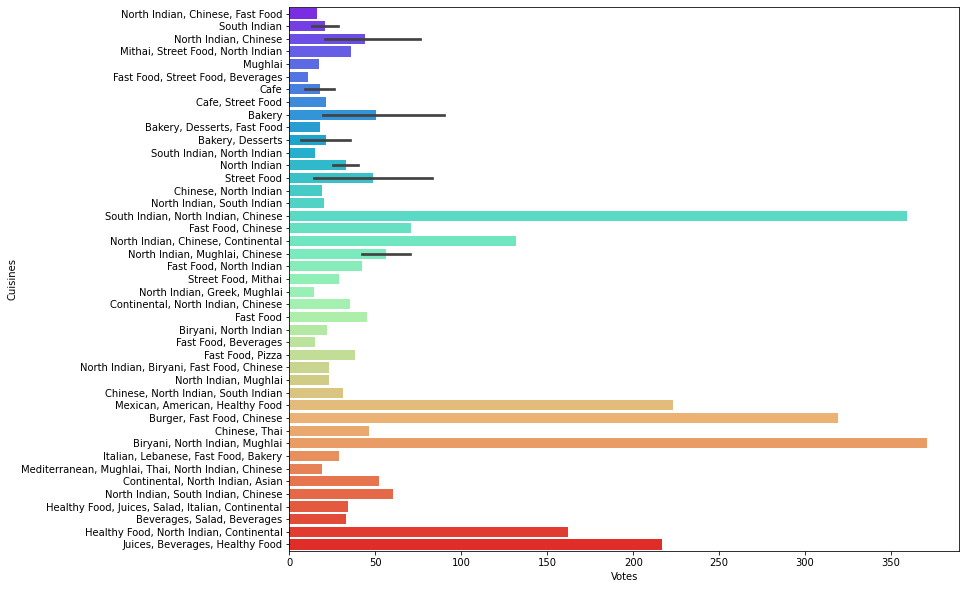

In [20]:
plt.figure(figsize=(12,10))
sns.barplot(x = 'Votes', y = 'Cuisines', data = df_area, palette='rainbow')
plt.show()

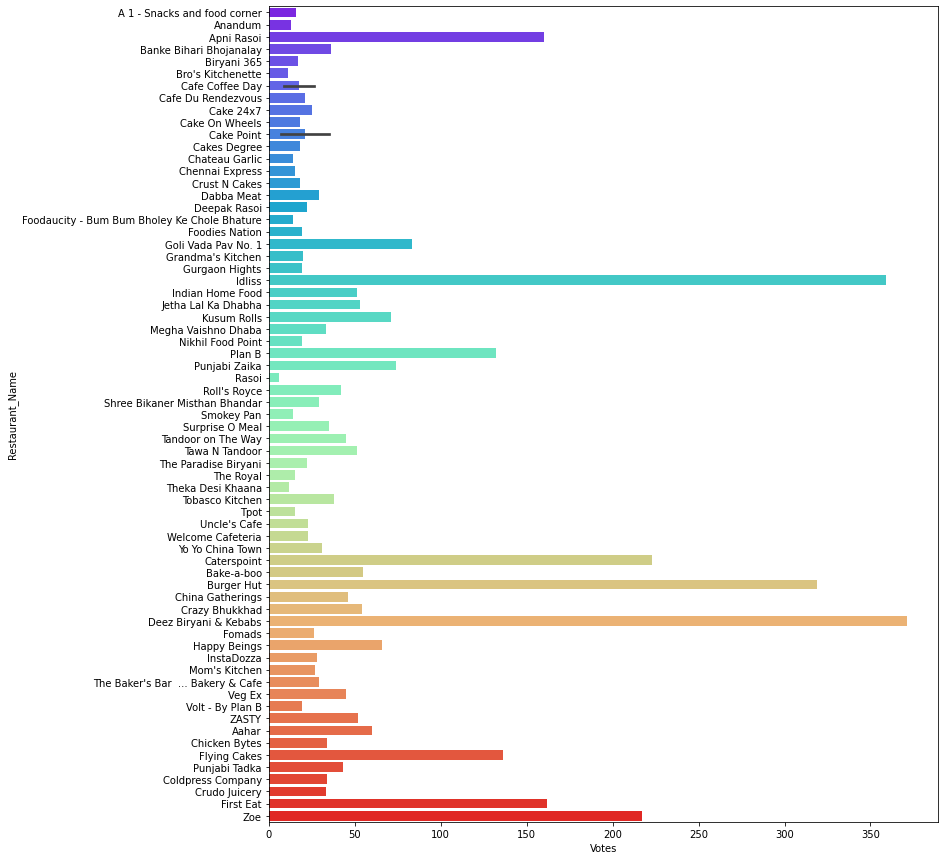

In [21]:
plt.figure(figsize=(12,15))
plot1 = sns.barplot(x = 'Votes', y = 'Restaurant_Name', data = df_area, palette='rainbow')
plt.show()

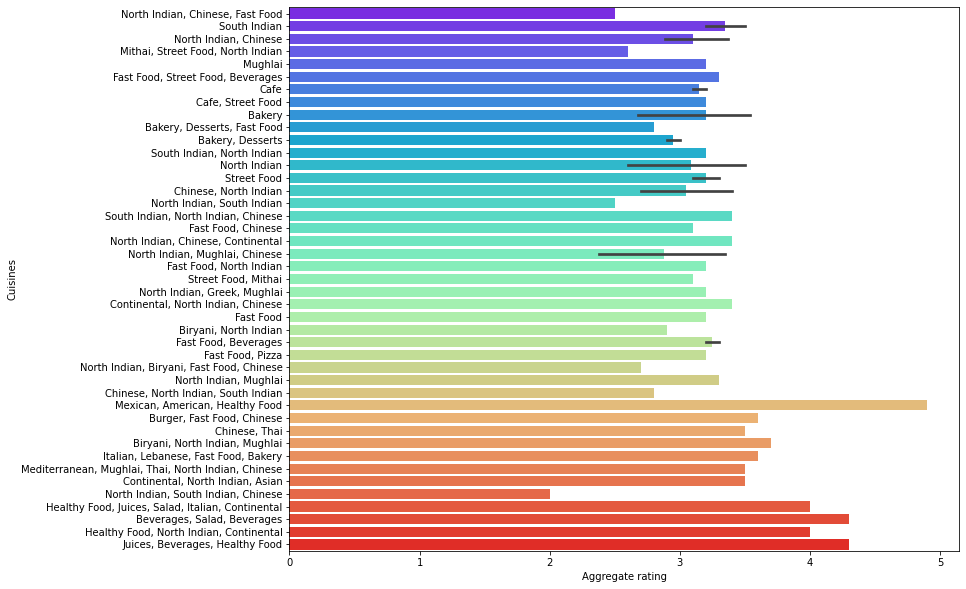

In [22]:
plt.figure(figsize=(12,10))
plot1 = sns.barplot(x = 'Aggregate rating', y = 'Cuisines', data = df_area, palette='rainbow')
plt.show()

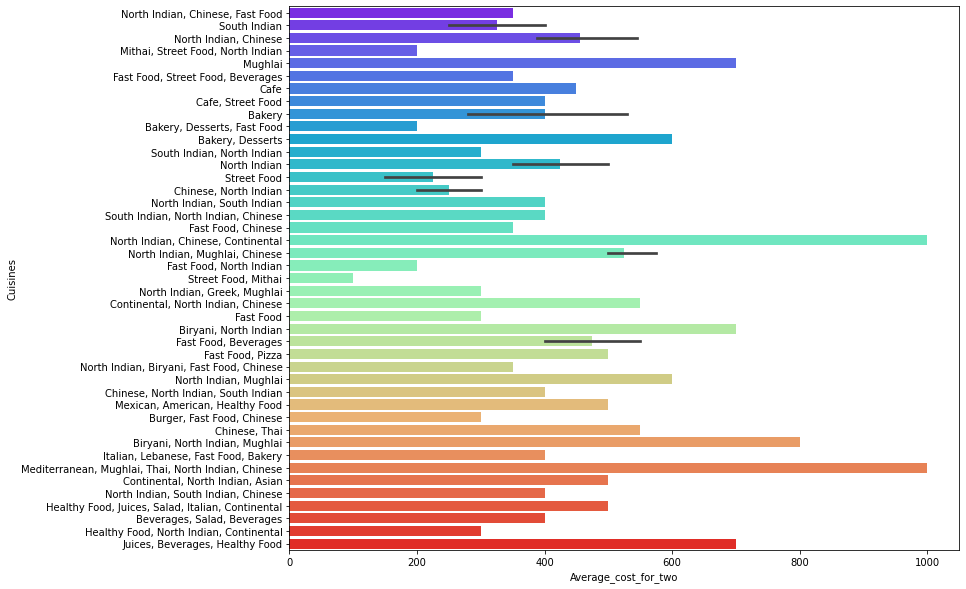

In [23]:
plt.figure(figsize=(12,10))
plot1 = sns.barplot(x = 'Average_cost_for_two', y = 'Cuisines', data = df_area, palette='rainbow')
plt.show()

In [24]:
#plt.figure(figsize=(9,9))
#plot1 = sns.barplot(x = 'Average Cost for two', y = 'Locality', hue = 'Cuisines', data = df_area, palette='rainbow')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.show()

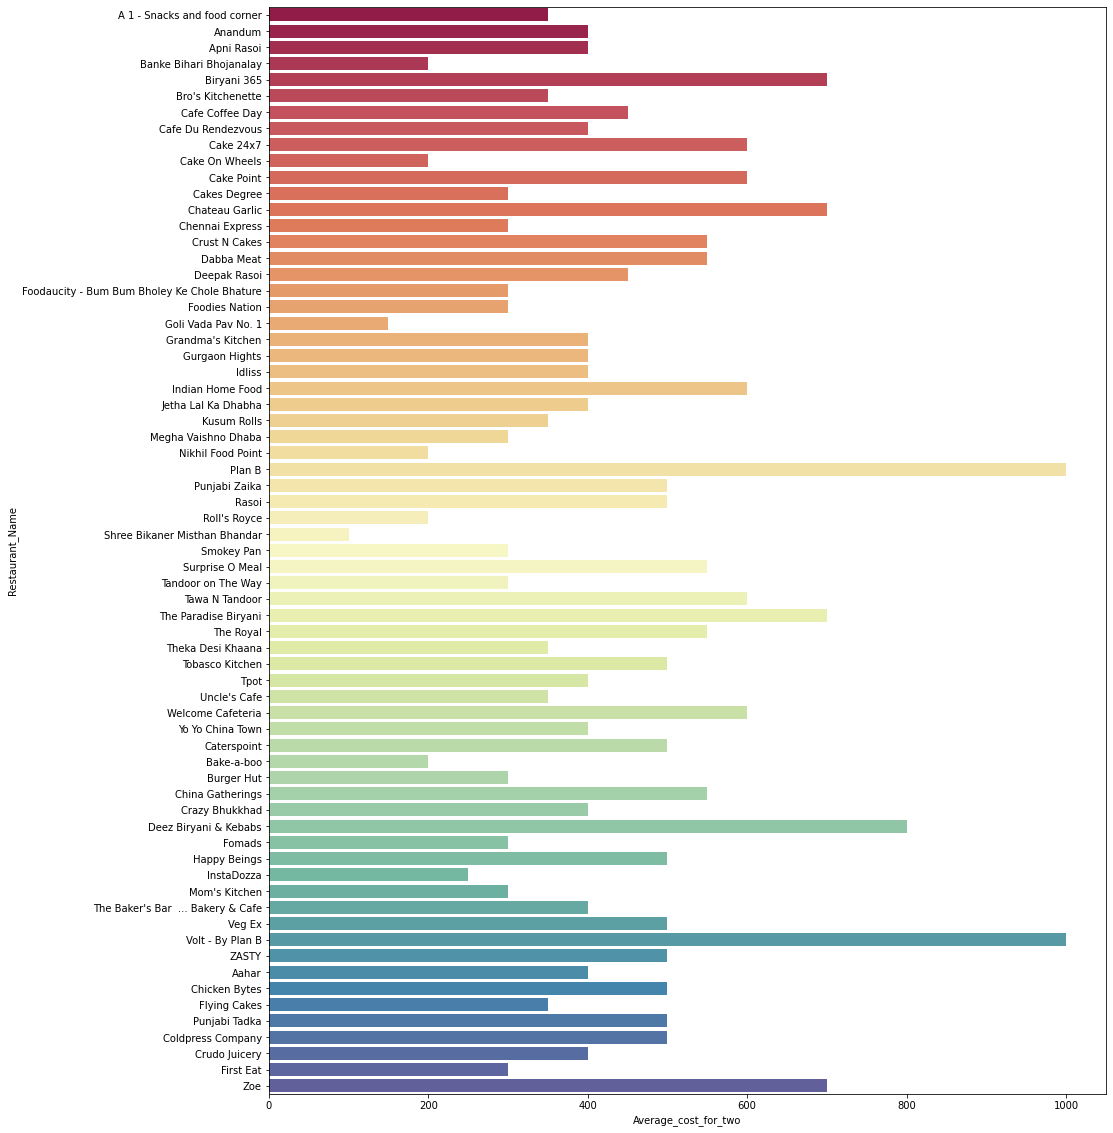

In [25]:
plt.figure(figsize=(15,20))
plot1 = sns.barplot(x = 'Average_cost_for_two', y = 'Restaurant_Name', data = df_area, palette='Spectral')
plt.show()

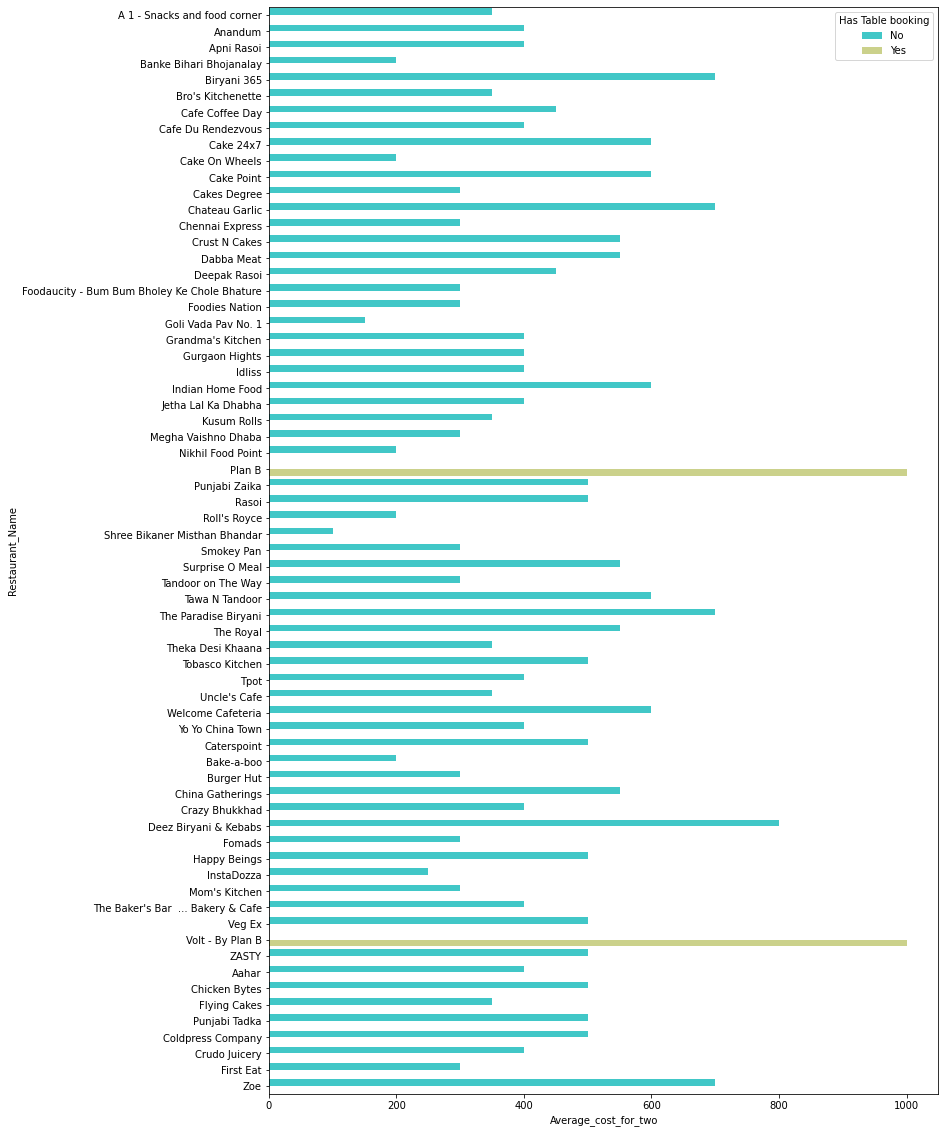

In [26]:
plt.figure(figsize=(12,20))
plot1 = sns.barplot(x = 'Average_cost_for_two', y = 'Restaurant_Name', hue = 'Has Table booking',  data = df_area, palette='rainbow')
plt.show()

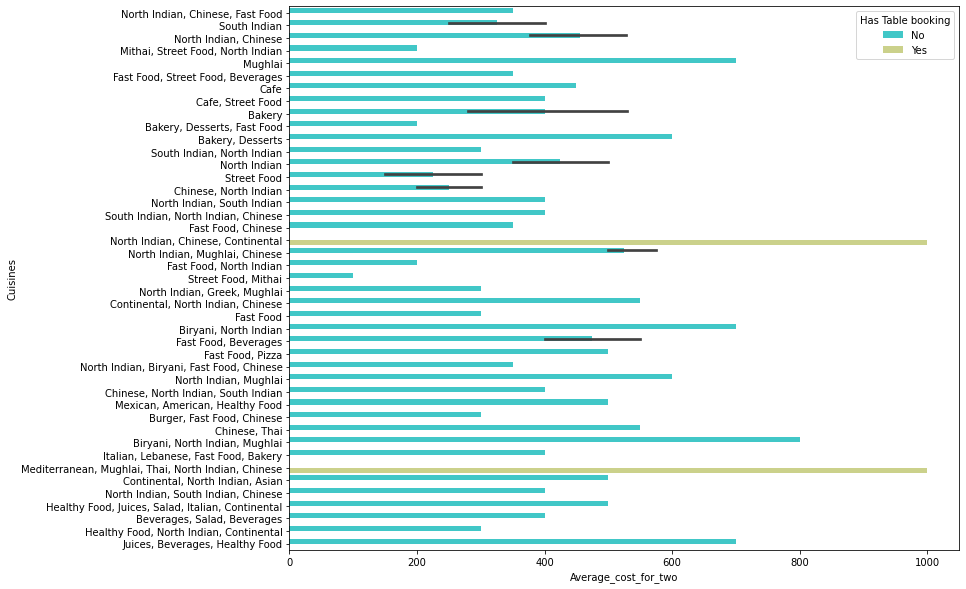

In [27]:
plt.figure(figsize=(12,10))
plot1 = sns.barplot(x = 'Average_cost_for_two', y = 'Cuisines', hue = 'Has Table booking',  data = df_area, palette='rainbow')
plt.show()

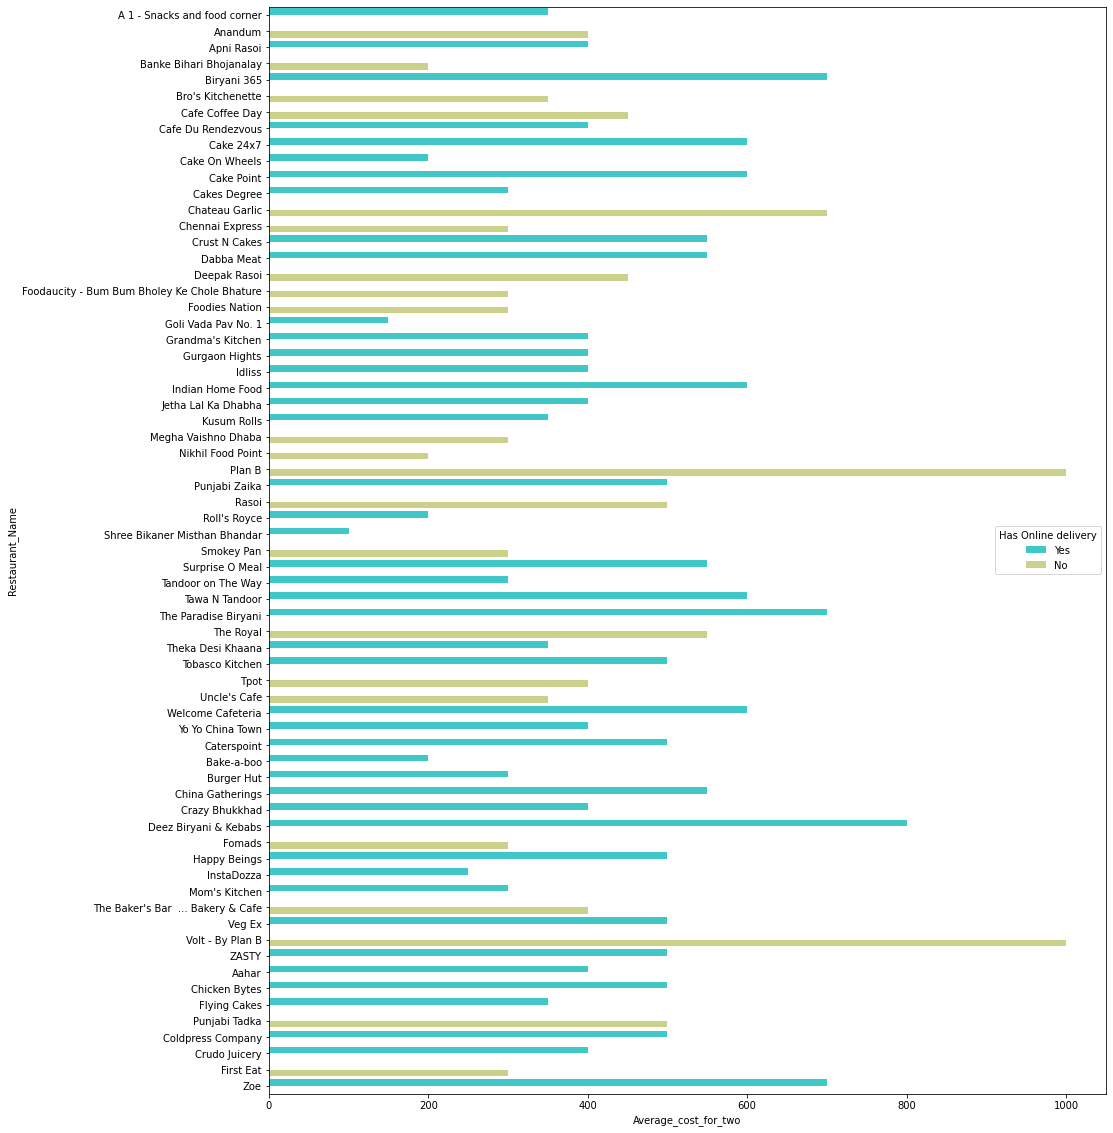

In [28]:
plt.figure(figsize=(15,20))
plot1 = sns.barplot(x = 'Average_cost_for_two', y = 'Restaurant_Name', hue = 'Has Online delivery',  data = df_area, palette='rainbow')
plt.show()

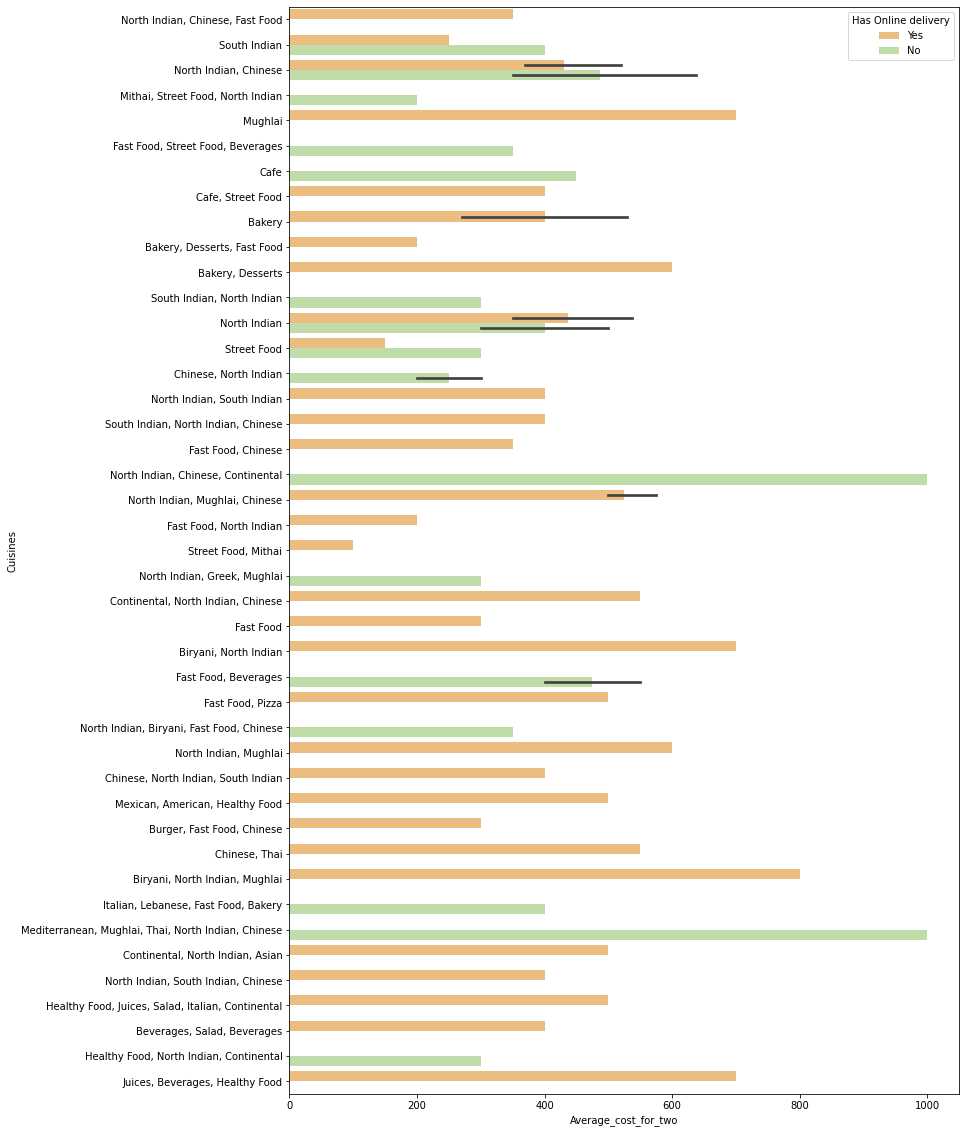

In [29]:
plt.figure(figsize=(12,20))
plot1 = sns.barplot(x = 'Average_cost_for_two', y = 'Cuisines', hue = 'Has Online delivery',  data = df_area, palette='Spectral')
plt.show()

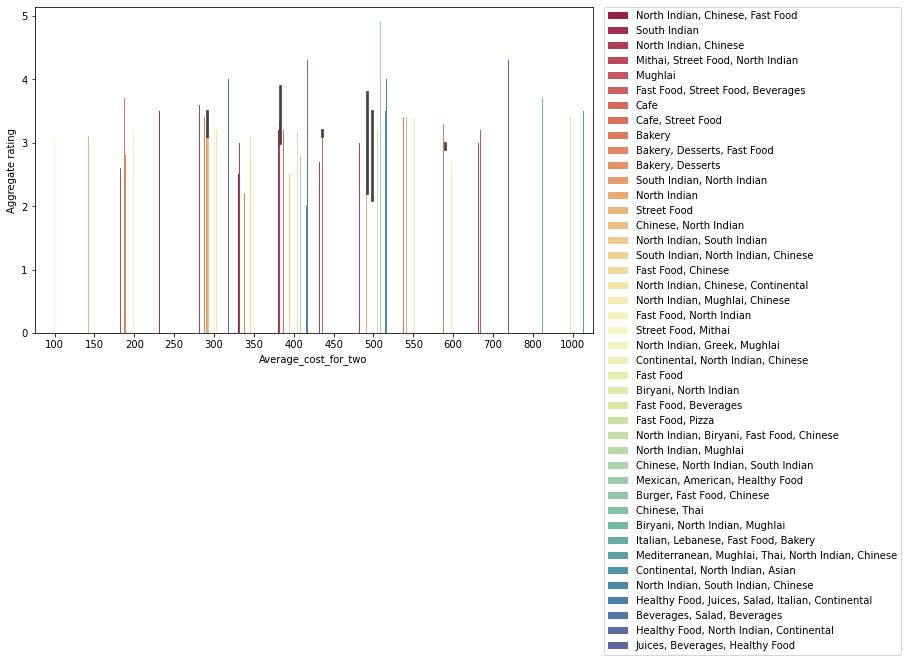

In [30]:
plt.figure(figsize=(10,6))
plot1 = sns.barplot(x = 'Average_cost_for_two', y = 'Aggregate rating', hue = 'Cuisines',  data = df_area, palette='Spectral')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

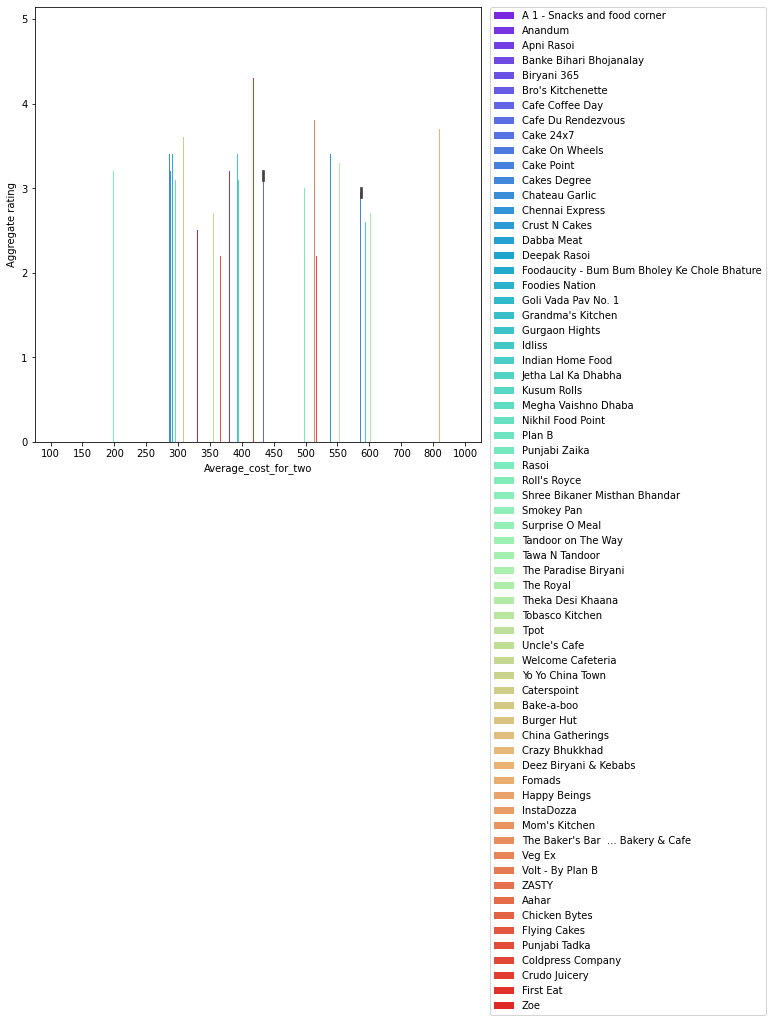

In [31]:
plt.figure(figsize=(8,8))
plot1 = sns.barplot(x = 'Average_cost_for_two', y = 'Aggregate rating', hue = 'Restaurant_Name',  data = df_area, palette='rainbow')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

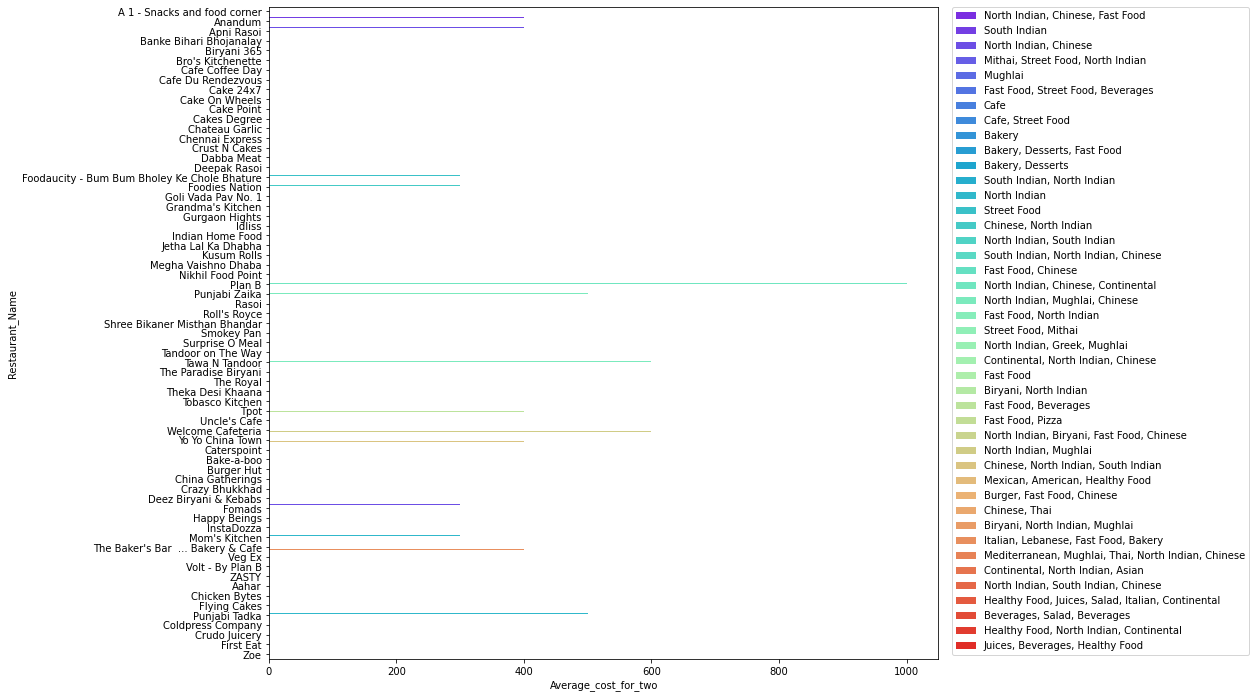

In [32]:
plt.figure(figsize=(12,12))
plot1 = sns.barplot(x = 'Average_cost_for_two', y = 'Restaurant_Name', hue = 'Cuisines',  data = df_area, palette='rainbow')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [33]:

# finding out the best economic restaurants in the area
df_eco = df_area.sort_values('Average_cost_for_two').copy()
#df_eco.head(3)
df_eco.loc[:,["Restaurant_Name", "City", "Address", "Average_cost_for_two", "Cuisines"]]

,Restaurant_Name,City,Address,Average_cost_for_two,Cuisines
1368,Shree Bikaner Misthan Bhandar,Gurgaon,"U-5/50, Road 16, DLF Phase 3, Gurgaon",100,"Street Food, Mithai"
1355,Goli Vada Pav No. 1,Gurgaon,"Near U Block, Rapid Metro Station, DLF Phase 3...",150,Street Food
1337,Banke Bihari Bhojanalay,Gurgaon,"U-8/26, DLF Phase 3, Gurgaon",200,"Mithai, Street Food, North Indian"
1363,Nikhil Food Point,Gurgaon,"U-69/3, DLF Phase 3, Gurgaon",200,"Chinese, North Indian"
1382,Bake-a-boo,Gurgaon,"U 55, DLF Phase 3, Gurgaon",200,Bakery
...,...,...,...,...,...
1348,Chateau Garlic,Gurgaon,"DLF Phase 3, Gurgaon",700,"North Indian, Chinese"
1373,The Paradise Biryani,Gurgaon,"Pink Town House Market, DLF Phase 3, Gurgaon",700,"Biryani, North Indian"
1386,Deez Biryani & Kebabs,Gurgaon,"S-27/17, Nathupura, DLF Phase 3, Gurgaon",800,"Biryani, North Indian, Mughlai"
1364,Plan B,Gurgaon,"Opposite City Court, Near Rapid Metro Station,...",1000,"North Indian, Chinese, Continental"


In [34]:
# finding out the best restaurants in the area 
df_best = df_area.sort_values(by='Aggregate rating', ascending = False).copy()
#df_best.head(3)
df_best.loc[:,["Restaurant_Name", "City", "Address", "Average_cost_for_two", "Cuisines", "Votes", "Aggregate rating"]]

,Restaurant_Name,City,Address,Average_cost_for_two,Cuisines,Votes,Aggregate rating
1381,Caterspoint,Gurgaon,"S-27/11, DLF Phase 3, Gurgaon",500,"Mexican, American, Healthy Food",223,4.9
1402,Zoe,Gurgaon,"T-24, Cyber Green, DLF Phase 3, Gurgaon",700,"Juices, Beverages, Healthy Food",217,4.3
1400,Crudo Juicery,Gurgaon,"DLF Phase 3, Gurgaon",400,"Beverages, Salad, Beverages",33,4.3
1401,First Eat,Gurgaon,"DLF Phase 3, Gurgaon",300,"Healthy Food, North Indian, Continental",162,4.0
1399,Coldpress Company,Gurgaon,"U79/12 DLF Phase 3, Gurgaon",500,"Healthy Food, Juices, Salad, Italian, Continental",34,4.0
...,...,...,...,...,...,...,...
1334,A 1 - Snacks and food corner,Gurgaon,"Shop 2, U-73, DLF Phase 3, Gurgaon",350,"North Indian, Chinese, Fast Food",16,2.5
1397,Flying Cakes,Gurgaon,"Shop 3, U-6/50, DLF Phase 3, Gurgaon",350,Bakery,136,2.2
1398,Punjabi Tadka,Gurgaon,"U-16/24, DLF Phase 3, Gurgaon",500,North Indian,43,2.2
1396,Chicken Bytes,Gurgaon,"Shop 4, U-6/50, DLF Phase 3, Gurgaon",500,"North Indian, Mughlai, Chinese",34,2.1


In [35]:
#finding out the most economic bakery shop :
df_eco_shop = df_eco.loc[df_eco['Cuisines'].str.contains('North Indian')]
df_eco_shop
df_eco_shop.loc[:,["Restaurant_Name", "City", "Address", "Average_cost_for_two", "Cuisines", "Votes"]]


,Restaurant_Name,City,Address,Average_cost_for_two,Cuisines,Votes
1337,Banke Bihari Bhojanalay,Gurgaon,"U-8/26, DLF Phase 3, Gurgaon",200,"Mithai, Street Food, North Indian",36
1363,Nikhil Food Point,Gurgaon,"U-69/3, DLF Phase 3, Gurgaon",200,"Chinese, North Indian",19
1367,Roll's Royce,Gurgaon,"U-9/28, DLF Phase 3, Gurgaon",200,"Fast Food, North Indian",42
1354,Foodies Nation,Gurgaon,"U-10/25, DLF phase 3, Gurgaon, Haryana-122001,...",300,"Chinese, North Indian",19
1362,Megha Vaishno Dhaba,Gurgaon,"U-21/1, Road 15, Near Mother Dairy, DLF Phase ...",300,North Indian,33
1349,Chennai Express,Gurgaon,"1st Floor, Near Phase 3 Rapid Metro Station, D...",300,"South Indian, North Indian",15
1401,First Eat,Gurgaon,"DLF Phase 3, Gurgaon",300,"Healthy Food, North Indian, Continental",162
1369,Smokey Pan,Gurgaon,"Shop U1/48 ,DLF Phase 3, Gurgaon",300,"North Indian, Greek, Mughlai",14
1387,Fomads,Gurgaon,"U-25/27, Ground Floor, DLF Phase 3, Gurgaon",300,"North Indian, Chinese",26
1390,Mom's Kitchen,Gurgaon,"U-9/26, DLF Phase 3, Gurgaon",300,North Indian,27


In [36]:
#finding out the best bakery shop :
#df_best_shop = df_best.loc[df_best['Cuisines'] == 'Bakery']
df_best_shop = df_best.loc[df_best['Cuisines'].str.contains('Bakery')] 
df_best_shop
df_best_shop.loc[:,["Restaurant_Name", "City", "Address", "Average_cost_for_two", "Cuisines", "Votes", "Rating text", "Aggregate rating"]]


,Restaurant_Name,City,Address,Average_cost_for_two,Cuisines,Votes,Rating text,Aggregate rating
1382,Bake-a-boo,Gurgaon,"U 55, DLF Phase 3, Gurgaon",200,Bakery,55,Good,3.7
1391,The Baker's Bar ... Bakery & Cafe,Gurgaon,"16/8, U Block, DLF Phase 3, Gurgaon",400,"Italian, Lebanese, Fast Food, Bakery",29,Good,3.6
1350,Crust N Cakes,Gurgaon,"DLF Phase 3, Gurgaon",550,Bakery,18,Average,3.4
1347,Cakes Degree,Gurgaon,"U 44/31-1, DLF Phase 3, Gurgaon",300,Bakery,18,Average,3.4
1343,Cake 24x7,Gurgaon,"S-27/9, Shop 5, DLF Phase 3, Gurgaon",600,Bakery,25,Average,3.3
1346,Cake Point,Gurgaon,"S-27/9 H, DLF Phase 3, Gurgaon",600,"Bakery, Desserts",35,Average,3.0
1345,Cake Point,Gurgaon,"U-1/29, DLF Phase 3, Gurgaon",600,"Bakery, Desserts",7,Average,2.9
1344,Cake On Wheels,Gurgaon,"S-27/9, The Village Super Mart, Opposite Pullm...",200,"Bakery, Desserts, Fast Food",18,Average,2.8
1397,Flying Cakes,Gurgaon,"Shop 3, U-6/50, DLF Phase 3, Gurgaon",350,Bakery,136,Poor,2.2


In [37]:
# finding best restaurants on the basis of votes and ratings in gurgaon, ie. a given city

df_city_best = df_city.sort_values(by='Aggregate rating', ascending = False).copy()
df_city_best.loc[:,["Restaurant_Name", "City", "Address", "Average_cost_for_two", "Cuisines", "Votes", "Aggregate rating"]]


,Restaurant_Name,City,Address,Average_cost_for_two,Cuisines,Votes,Aggregate rating
1381,Caterspoint,Gurgaon,"S-27/11, DLF Phase 3, Gurgaon",500,"Mexican, American, Healthy Food",223,4.9
1838,Matchbox,Gurgaon,"30, Ground Floor, Sector 29, Gurgaon",1500,"Continental, North Indian, Chinese",245,4.8
1839,Prankster,Gurgaon,"Site 8-10, Sector 29, Gurgaon",1500,"Modern Indian, North Indian",1478,4.8
1837,feel ALIVE,Gurgaon,"SCO 53, 2nd Floor, Main Market, Sector 29, Gur...",1200,"North Indian, American, Asian, Biryani",69,4.7
1464,Manhattan Brewery & Bar Exchange,Gurgaon,"1st Floor, Global Foyer Mall, Sector 43, Golf ...",2000,"Finger Food, American, Continental, North Indi...",2093,4.6
...,...,...,...,...,...,...,...
2093,AK Your Food,Gurgaon,"Shop 4, B Block, Gate 2, Sector 52, South City...",600,North Indian,0,0.0
2094,Freshnfit.in,Gurgaon,"Sector 52, Near South City 2, Gurgaon",250,Juices,1,0.0
2095,Shri Ram Bhojnalaya,Gurgaon,"Shop 6, Vohra Market, South City 2, Gurgaon",150,North Indian,0,0.0
2096,Special O-cake-sions,Gurgaon,"702, Jai Heights, Plot 10, Sector 52, South Ci...",300,"Bakery, Desserts",0,0.0
